# Exploratory Data Analysis

This notebook aims to explore the car feature dataset and uncover trends to help predict car
prices. This notebookk will:

- rank utility of features using mutual infomation
- explore relationship of variables with price

In [1]:
from eda import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df = pd.read_pickle('car_data.pkl')
df.head()

,make,model,trim,manufactured_year,body_type,mileage,engine_size,transmission,fuel_type,doors,...,combined,co2_emissions,insurance_group,seller_segment,seller_rating,total_reviews,region,county,town,ulez
1,vauxhall,astra,sxi,2007,hatchback,70000,1.4,manual,petrol,3,...,46.3,146,10e,independent,5.0,18,london,middlesex,hounslow,1
2,volkswagen,polo,moda,2010,hatchback,89000,1.2,manual,petrol,3,...,51.4,128,05e,independent,4.8,125,london,hertfordshire,barnet,1
3,vauxhall,astra,sxi,2008,hatchback,117000,1.4,manual,petrol,5,...,46.3,146,10e,independent,4.4,7,london,essex,ilford,1
4,mazda,mazda3,sport,2007,hatchback,93500,2.0,manual,petrol,5,...,35.8,189,20e,independent,5.0,18,south_west,wiltshire,swindon,1
8,mini,hatch,cooper,2004,hatchback,63977,1.6,manual,petrol,3,...,42.2,163,21e,independent,4.1,37,london,surrey,wandsworth,0


In [3]:
X = df.copy()
y = X.pop('price')

## Get mutual infomation scores

In [4]:
X = get_label_encoding_for_categoricals(X)
X.head()

,make,model,trim,manufactured_year,body_type,mileage,engine_size,transmission,fuel_type,doors,...,combined,co2_emissions,insurance_group,seller_segment,seller_rating,total_reviews,region,county,town,ulez
1,0,0,0,2007,0,70000,1.4,0,0,3,...,46.3,146,0,0,5.0,18,0,0,0,1
2,1,1,1,2010,0,89000,1.2,0,0,3,...,51.4,128,1,0,4.8,125,0,1,1,1
3,0,0,0,2008,0,117000,1.4,0,0,5,...,46.3,146,0,0,4.4,7,0,2,2,1
4,2,2,2,2007,0,93500,2.0,0,0,5,...,35.8,189,2,0,5.0,18,1,3,3,1
8,3,3,3,2004,0,63977,1.6,0,0,3,...,42.2,163,3,0,4.1,37,0,4,4,0


In [5]:
mi_scores = make_mi_scores(X, y)
mi_scores[::3]

length                1.003196
wheelbase             0.774598
height                0.652426
engine_power          0.565056
fuel_tank_capacity    0.300827
make                  0.247569
number_of_owners      0.233726
engine_size           0.216257
urban                 0.181560
transmission          0.116217
county                0.109081
cylinders             0.080720
region                0.046993
seats                 0.021188
Name: MI Scores, dtype: float64

Key variables like manufactured year and mileage look they have a effect of price as expected.
By this metric valiables like doors and seats have little to no effect on price.

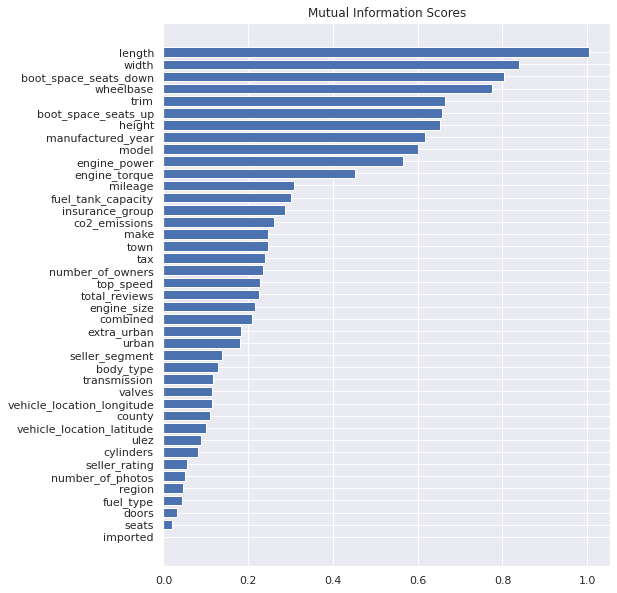

In [6]:
plot_mi_scores(mi_scores)

The price distribution shows that prices range up to £200,000 on the extreme upper end. However morst of the price data is below £60,000 as seen on the right side of the figure below. The data is also right skewed.

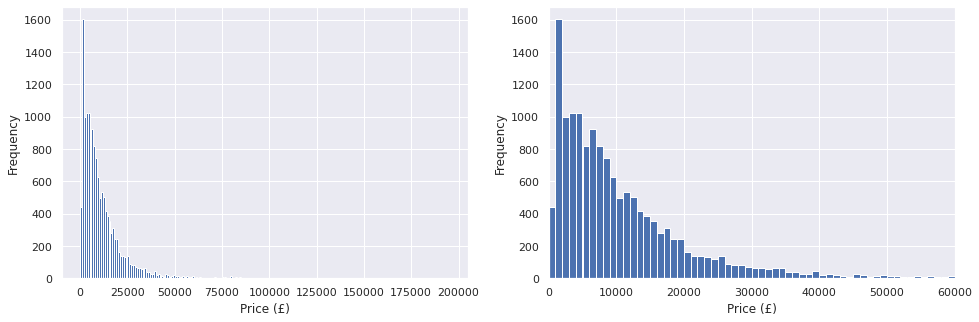

In [7]:
plot_price_historgam_subplot(df)

Plotting some of the numerical variables against price we can see trends below.
1. Car length is ranked 1 for the mutual information scores and as seen in the chart there is a positive correlation between car length and price.
2. Price seems to increase with boot space, but more so with the seats down measurement. This is also confirmed by the mutual information scores as the seats down measurement was ranked higher than the seats up measurement.
3. Price increases with the wheelbase. There are some incorrect figures as some wheelbase data points are at 0mm which makes no sense.
4. Height, manufactured ear and engine power all have strong positive correlations with price. 

In [ ]:
df_sample = df.sample(frac=.4, random_state=1)

fig, ax = plt.subplots(2, 3, figsize=[24, 15])

# fig 1
ax[0,0].scatter(df_sample.length, df_sample.price, alpha=0.5)
ax[0,0].set(ylabel= 'Price (£)', xlabel='Length (mm)')

# fig 2
ax[0,1].scatter(df_sample.boot_space_seats_down, df_sample.price, alpha=0.5)
ax[0,1].set(ylabel= 'Price (£)', xlabel='Boot Space (L)')
ax[0,1].scatter(df_sample.boot_space_seats_up, df_sample.price, alpha=0.5)
ax[0,1].set_xlim(0, 3000)
ax[0,1].legend(['Seats Down', 'Seats Up'], loc="upper right")

# fig 3
ax[0,2].scatter(df_sample.wheelbase, df_sample.price, alpha=0.5)
ax[0,2].set(ylabel= 'Price (£)', xlabel='Wheelbase (mm)')

# fig 4
ax[1,0].scatter(df_sample.width, df_sample.price, alpha=0.5)
ax[1,0].set(ylabel= 'Price (£)', xlabel='Height (mm)')

# fig 5
ax[1,1].scatter(df_sample.manufactured_year, df_sample.price, alpha=0.5)
ax[1,1].set(ylabel= 'Price (£)', xlabel='Manufactured Year')

# fig 6
ax[1,2].scatter(df_sample.engine_power, df_sample.price, alpha=0.5)
ax[1,2].set(ylabel= 'Price (£)', xlabel='Engine Power (bhp)');

1. Engine torque, mileage, fuel tank capacity and CO2 emmissions seem to have strong correlations with price and will likely be useful in price prediction.
2. The relationship between annual tax and price is unclear. Tax is ranked low on the mutual information scores.
3. Price decreases with an increase in number of owners. Number of owners could be closely correlated with mileage.

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=[24, 15])

# fig 1
ax[0,0].scatter(df_sample.engine_torque, df_sample.price, alpha=0.5)
ax[0,0].set(ylabel= 'Price (£)', xlabel='Engine Torque (lbs/ft)')

# fig 2
ax[0,1].scatter(df_sample.mileage, df_sample.price, alpha=0.5)
ax[0,1].set(ylabel= 'Price (£)', xlabel='Mileage (miles)')

# fig 3
ax[0,2].scatter(df_sample.fuel_tank_capacity, df_sample.price, alpha=0.5)
ax[0,2].set(ylabel= 'Price (£)', xlabel='Fuel Tank Capacity (L)')

# fig 4
ax[1,0].scatter(df_sample.co2_emissions, df_sample.price, alpha=0.5)
ax[1,0].set(ylabel= 'Price (£)', xlabel='CO2 Emmissions (g/km)')

# fig 5
ax[1,1].scatter(df_sample.tax, df_sample.price, alpha=0.5)
ax[1,1].set(ylabel= 'Price (£)', xlabel='Annual Tax (£)')

# fig 6
ax[1,2].scatter(df_sample.number_of_owners, df_sample.price, alpha=0.5)
ax[1,2].set(ylabel= 'Price (£)', xlabel='Number of Owners')

1. Price increases with top speed and engine size.
2. Total sellers reviews does not have a clear trend with price.
3. Combined, urban and extra urban ratings all seem to have a slight negative correlation with price although it's not very clear. These variables may not be good predictors of price.

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=[24, 15])

# fig 1
ax[0,0].scatter(df_sample.top_speed, df_sample.price, alpha=0.5)
ax[0,0].set(ylabel= 'Price (£)', xlabel='Top Speed (mph)')

# fig 2
ax[0,1].scatter(df_sample.total_reviews, df_sample.price, alpha=0.5)
ax[0,1].set(ylabel= 'Price (£)', xlabel='Total Reviews')

# fig 3
ax[0,2].scatter(df_sample.engine_size, df_sample.price, alpha=0.5)
ax[0,2].set(ylabel= 'Price (£)', xlabel='Engine Size (L)')

# fig 4
ax[1,0].scatter(df_sample.combined, df_sample.price, alpha=0.5)
ax[1,0].set(ylabel= 'Price (£)', xlabel='Combined (mpg)')

# fig 5
ax[1,1].scatter(df_sample.urban, df_sample.price, alpha=0.5)
ax[1,1].set(ylabel= 'Price (£)', xlabel='Urban (mpg)')

# fig 6
ax[1,2].scatter(df_sample.extra_urban, df_sample.price, alpha=0.5)
ax[1,2].set(ylabel= 'Price (£)', xlabel='Extra Urban (mpg)')

1. Longitude, doors, seats and number of photos do not have a clear correlation with price so will probably be useless for price prediction.
2. Seller ratings is positively correlated with price. However not all sellers have ratings as some are private. This can lead a lot of data loss if this variable is used.
3. Price increases with number of valves and cylinders.

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=[24, 15])

# fig 1
ax[0,0].scatter(df_sample.valves, df_sample.price, alpha=0.5)
ax[0,0].set(ylabel= 'Price (£)', xlabel='Valves')

# fig 2
ax[0,1].scatter(df_sample.vehicle_location_longitude, df_sample.price, alpha=0.5)
ax[0,1].set(ylabel= 'Price (£)', xlabel='Vehicle Location Longitude')

# fig 3
ax[0,2].scatter(df_sample.cylinders, df_sample.price, alpha=0.5)
ax[0,2].set(ylabel= 'Price (£)', xlabel='Cylinders')

# fig 4
ax[1,0].scatter(df_sample.seller_rating, df_sample.price, alpha=0.5)
ax[1,0].set(ylabel= 'Price (£)', xlabel='Seller Rating')

# fig 5
ax[1,1].scatter(df_sample.number_of_photos, df_sample.price, alpha=0.5)
ax[1,1].set(ylabel= 'Price (£)', xlabel='Number of Photos ')

# fig 6
ax[1,2].scatter(df_sample.doors, df_sample.price, alpha=0.5)
ax[1,2].set(ylabel= 'Price (£)', xlabel='Doors')

In [ ]:
fig, ax = plt.subplots(figsize=[8, 5])

ax.scatter(df_sample.seats, df_sample.price, alpha=0.1)
ax.set(ylabel= 'Price (£)', xlabel='Seats')


1. Figures 1 and 2 show the top ten makes and models in terms of price. It includes luxury cars such as maseratia and porshe.
2. Automatic transmission cars have a higher median price than manuals
3. Fuel type seems to have an effect on price. Diesel plugin hybrids have the highest median price.
4. Body type does not seem to have much effect on price with the exception of the van. This has a higher median than the other body types.

In [ ]:
mean_price_by_make = df.groupby('make')['price'].mean().round(0).dropna().astype('int').sort_values(ascending=False)
mean_price_by_model = df.groupby('model')['price'].mean().round(0).dropna().astype('int').sort_values(ascending=False)

In [ ]:
df.fuel_type = df.fuel_type.astype('object').astype('category')
df.body_type = df.body_type.astype('object').astype('category')

fig, ax = plt.subplots(2, 3, figsize=[24, 15])
base_color = sns.color_palette()[0]

N = 10
ticks = np.arange(N) 
width = 0.7   

# fig 1 
ax[0,0].bar(ticks, mean_price_by_make.values[:N], width)
ax[0,0].set_xticks(ticks) 
ax[0,0].set_xticklabels(mean_price_by_make.index[:N], rotation=45)
ax[0,0].set(ylabel= 'Mean Price (£)', xlabel='Car Make')

# fig 2
ax[0,1].bar(ticks, mean_price_by_model.values[:N], width)
ax[0,1].set_xticks(ticks) 
ax[0,1].set_xticklabels(mean_price_by_model.index[:N], rotation=45)
ax[0,1].set(ylabel= 'Mean Price (£)', xlabel='Model')

# fig 3
sns.boxplot(data = df, x = 'transmission', y = 'price', ax=ax[0,2], color=base_color)
ax[0,2].set(ylabel= 'Price (£)', xlabel='Transmission')

# fig 4
sns.boxplot(data = df, x = 'fuel_type', y = 'price', ax=ax[1,0], color=base_color)
ax[1,0].tick_params(axis='x', labelrotation=45)
ax[1,0].set(ylabel= 'Price (£)', xlabel='Fuel Type')

# fig 5
sns.boxplot(data = df, x = 'body_type', y = 'price', ax=ax[1,1], color=base_color)
ax[1,1].tick_params(axis='x', labelrotation=45)
ax[1,1].set(ylabel= 'Price (£)', xlabel='Body Type')

fig.tight_layout()
fig.delaxes(ax[1,2])